# San Francisco Crime Incidents Visualization/Analysis
Bill Beluch

## Table of Contents
1. [Introduction](#Introduction)
2. [Initial Ideas](#Initial-ideas)
3. [First visualizations](#First-visualizations)
4. [Temporal heatmap](#Temporal-heatmap)
5. [What is causing a peak in crime at 12 PM?](#What-is-causing-a-peak-in-crime-at-12-PM?)
6. [Crime by hour plotted by category](#Crime-by-hour-plotted-by-category)
7. [Comparison with Seattle](#Comparison-with-Seattle)  
     1. [Comparison results](#Comparison-results)
8. [Conclusions](#Conclusions)

## Introduction
In this notebook I run through some exploratory visualizations of the data contained in the San Francisco police department crimes dataset.  For the purpose of expediting loading times (and sparing my computer's RAM) when making visualizations, I limited the dataset only to crimes that took place in the year 2014.  The full dataset can be found here: https://data.sfgov.org/Public-Safety/SFPD-Incidents-from-1-January-2003/tmnf-yvry.  All data handling is performed with Numpy and Pandas, and plotting is performed using Matplotlib, Seaborn, and Bokeh. 

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('./SFPD_Incidents_2014.csv', delimiter = ',')
data = data.dropna(axis=0)
data.head()

,IncidntNum,Category,DayOfWeek,Date,Time,PdDistrict,X,Y
0,140009459,ARSON,Saturday,01/04/2014,03:52,NORTHERN,-122.420875,37.791494
1,140042001,FRAUD,Wednesday,01/15/2014,12:30,CENTRAL,-122.400749,37.791178
2,140071185,VEHICLE THEFT,Thursday,01/23/2014,18:00,TARAVAL,-122.461139,37.709085
3,140094892,ASSAULT,Saturday,02/01/2014,16:33,SOUTHERN,-122.403434,37.787643
4,140096371,ROBBERY,Sunday,02/02/2014,06:50,SOUTHERN,-122.417105,37.774324


In [3]:
#will make some new columns(hour and month) in the dataframe to expedite later use
def get_hour(time):
    return int(time[:2])

def get_month(date):
    return int(date[:2])
    
data['hour'] = data.Time.apply(get_hour)
data['month'] =  data.Date.apply(get_month)

## Initial Ideas
Based on the available data, one thing that jumps out to quickly look at is the temporal aspect of the crimes, as we have detailed information on that front.  Other potential interesting things to look at are the geographical aspect of the crimes, considering there is latitute/longitude information, as well as perhaps differences between the police districts.  

Focusing on time, it is important to note that it is unclear as to what the time in the dataset specifically refers to - is this the time someone called the police?  Is it the time the police showed up to the crime scene?  Or perhaps the time when the crime was rumored to occur?  

In [4]:
from bokeh.plotting import figure, show
from bokeh.models import Range1d
from bokeh.palettes import Spectral11
from bokeh.io import output_notebook

#horizontal bar chart to plot most common crimes by frequency - note this graph will appear after the next code block 
tmp = pd.DataFrame(data['Category'].value_counts()).reset_index()
tmp.columns = ['Category', 'Count']

#this really should only be one figure below (p4), however due to an issue with Bokeh, I need two duplicates for the display that will be seen below
#the issue is that if the same figure is referenced in multiple panes in Bokeh, it only shows up in one of the panes - thus duplicates are needed so a new figure
#can be assigned to each pane  

p4 = figure(width=450, height=450, y_range=list(tmp.Category[:15][::-1]),  x_range = Range1d(start=0, end=tmp.Count[0]*1.1), title="Top 15 Most Common Crimes",)
p5 = figure(width=450, height=450, y_range=list(tmp.Category[:15][::-1]),  x_range = Range1d(start=0, end=tmp.Count[0]*1.1), title="Top 15 Most Common Crimes",)
p6 = figure(width=450, height=450, y_range=list(tmp.Category[:15][::-1]),  x_range = Range1d(start=0, end=tmp.Count[0]*1.1), title="Top 15 Most Common Crimes",)

top = 15 + 1+ 0.35
for count in tmp.Count[:15]: 
    top  = top - 1
    bottom = top - 0.7
    left   = 0
    right  = count
    p4.quad(top=top, bottom=bottom, left=left, right=right, color=Spectral11[0])
    p5.quad(top=top, bottom=bottom, left=left, right=right, color=Spectral11[0])
    p6.quad(top=top, bottom=bottom, left=left, right=right, color=Spectral11[0])

p4.xaxis.axis_label = 'Count'
p5.xaxis.axis_label = 'Count'
p6.xaxis.axis_label = 'Count'

In [5]:
from bokeh.models import PrintfTickFormatter, FactorRange, Range1d
from bokeh.charts import Bar
from bokeh.io import hplot
from bokeh import plotting 
from bokeh.models.widgets import Panel, Tabs

#histogram 1 - number of crimes by hour - I originally used this custom histogram as opposed to a Bokeh chart because the spacing of the ticks did not line 
#up with the actual hour splits, and it was proving rather difficult to fix that...
hour_data = data['hour'].value_counts().reset_index().sort_values(by='index')
hour_data.columns = ['Time', 'Count']
p = figure(width=450, height=450, title_text_font_size='12pt')
left = -1
ii = -1
alpha = [1, 0.6] * 12
for count in hour_data.Count: 
    top  =count
    bottom = 0
    left   = left + 1 
    right  = left + 1 
    ii += 1 
    p.quad(top=top, bottom=bottom, left=left, right=right, color=Spectral11[1], line_color='black', alpha=alpha[ii]) 
    
p.x_range = Range1d(start=0, end=24)
p.title = "Frequency of Crimes By Hour"
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Frequency'
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_size = "14pt"
p.title_text_font_size = '16pt'
p.xaxis[0].formatter = p.xaxis[0].formatter = PrintfTickFormatter(format="%2u:00")
        
#second histogram - number of crimes by month 
month_data = data['month'].value_counts().reset_index().sort_values(by='index')
month_data.columns = ['Time', 'Count']
month_data = month_data.set_index('Time')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
month_data['Month'] = months

p2 = Bar(month_data, 'Month', values='Count', ylabel='Count', bar_width=0.8, width=450, height=450, color=Spectral11[3])
p2.x_range = FactorRange(factors=months)
p2.title = "Frequency of Crimes By Month"
p2.title_text_font_size='16pt'
p2.y_range = Range1d(start=11000, end=13500)

#third histogram - number of crimes by day of the week 
day_data = data['DayOfWeek'].value_counts().reset_index().sort_values(by='index')
day_data.columns = ['Time', 'Count']
day_data = day_data.set_index('Time')

def shorten_day(input):
    return input[:3]

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_data['Day'] = list(day_data.reset_index().Time.apply(shorten_day))
p3 = Bar(day_data, 'Day', values='Count', ylabel='Count', width=450, height=450)
p3.x_range = FactorRange(factors=days)
p3.title = "Frequency of Crimes By Day"
p3.title_text_font_size='16pt'
p3.y_range = Range1d(start=18000, end=24000)

#now to output the data - note that in the tabs we are including the graph from the above cell 
output_notebook()

tab1 = Panel(child=hplot(p4, p), title="Hour")
tab2 = Panel(child=hplot(p5, p3) , title="Day")
tab3 = Panel(child=hplot(p6, p2), title='Month')
tabs = Tabs(tabs=[ tab1, tab2, tab3 ])
show(tabs)

Loading BokehJS ...

## First visualizations
On the left, we see the top 15 crimes by frequency over the entire yearlong dataset.  Note that there are 38 crimes represented in total - the clear majority of these are larceny/theft, other offenses, non-criminal, and assault.  Indeed some of the less common crimes have less than 100 occurences, some with even less than 10 occurences.  

Next we have our first look into how the crime counts change over a series of temporal aspects.  Over the course of the 24 hour period, looking at all crimes, there is a significant dip in the middle of the night (2-6 AM), followed by a steady rise until the early evening, with the peak nmber of crimes occuring around 5-8 PM.  It is interesting to note that there seems to be a strange peak in the number of crimes occuring in the hour of 12 PM.  

Over the course of a day, unsurpisingly the most crimes occur on Friday and Saturday, with a sharp drop in crimes on Sunday (it is supposed to be a rest day after all...).  

The crimes by month graph shows an even greater variation - however in the scheme of things these absolute changes are not so extreme, it is more a matter of the scaling of the graph (which should probably be changed).  At first glance February seems to be a low crime month, but if one factors in that is 3 days shorter than both January and March, and extrapolates the crime rate in February to be that of a 31 day month, it's total crime count would rise to approximately 12780 - right about where January is.  



In [6]:
from math import pi, floor
from bokeh.models import HoverTool
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.palettes import Reds9
from bokeh.models import PrintfTickFormatter


#will now plot a heatmap of the above data, to capture day and hour in the same figure  
Reds9 = Reds9[::-1]
groups = data.groupby(['DayOfWeek', 'hour']).size()
max_crimes = max(groups)
min_crimes = min(groups)
factor = (max_crimes - min_crimes) / 8.9999999

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'][::-1]
days_abbr = [day[:4] for day in days]
hours = list(range(24))

# Set up the data for plotting. We will need to have values for every
# pair of day/hour names. Map the rate to a color.
day= []
hour = []
color = []
counts = []
for d in days:
    for h in hours:
        day.append(d)
        hour.append(str(h))
        count = groups[d][h:h+1].values[0]
        counts.append(count)
        color_index = floor((count - min_crimes) / factor)
        color.append(Reds9[color_index])        

source = ColumnDataSource(
    data=dict(day=day, hour=hour, color=color, counts=counts)
)

TOOLS = "resize,hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Frequency of Crimes Throughout the Week", x_range=[str(h) for h in hours], y_range=days,
           x_axis_location="above", plot_width=900, plot_height=400,
           toolbar_location="left", tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi/3

p.rect("hour", "day", 1, 1, source=source,
       color="color", line_color=None)

p.select_one(HoverTool).tooltips = [
    ('Time of Week', '@day @hour'),
    ('Crime Count', '@counts'),]

output_notebook()

show(p)      # show the plot

Loading BokehJS ...

## Temporal heatmap   
The above plot is simply a way to visualize both the day of the week and the hour in one figure.  A darker square represents more crimes at that time point.  We see broadly the same trends as in the initial visualizations.  The odd peak at 12 PM is again apparent.  One can see the raw counts by hovering over the squares.  

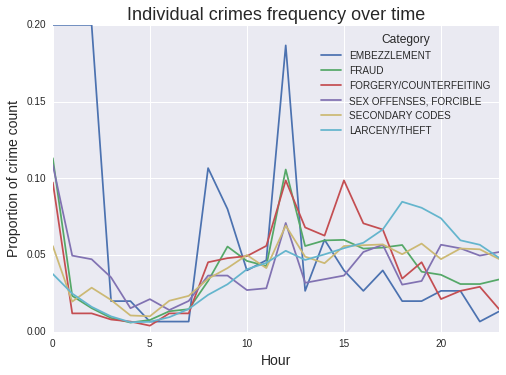

In [7]:
#Will look to see what is causing this peak at 12!

tmp = data[['IncidntNum', 'Category', 'hour', 'PdDistrict']]
totals = tmp['Category'].value_counts()
groups = tmp.groupby(['Category', 'hour']).agg({'hour': 'count'})
percents = groups.groupby(level=0).apply(lambda x: x / float(x.sum()))

to_plot = percents[['hour']].unstack(level=0).fillna(method='ffill').fillna(value=0)['hour']
to_plot = to_plot.drop(['TREA', 'PORNOGRAPHY/OBSCENE MAT'], 1)
#to_plot.ix[12].plot(kind='bar')
diff12_11 = to_plot.ix[12] - to_plot.ix[11]
diff11_10 = to_plot.ix[11] - to_plot.ix[10]
diff13_12 = to_plot.ix[13] - to_plot.ix[12]
value_counts = data['Category'].value_counts().sort_index()
to_plot2 = diff12_11[(diff12_11 > 0) & (diff13_12 < 0) & (value_counts > 100)].sort_values(ascending=False)[:5]
to_plot[list(to_plot2.index) + ['LARCENY/THEFT']].plot()
plt.ylabel('Proportion of crime count', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.title('Individual crimes frequency over time', fontsize=18)

## What is causing a peak in crime at 12 PM?
NOTE:  Each crime is scaled so that at each hour the data point is the percentage of total crimes (per individual crime) that occured during that hour.  

As something that stuck out in the initial visualizations, I figured I would briefly investigate a bit the peak in crime at 12PM.  My first thought is to see how each of the crimes are behaving indivdiually at 12 PM.   Since larceny/theft makes up a big portion of the total crimes, a moderate increase in its 12PM crime rate could easily swing the whole dataset.  However, when one looks at the crimes that show the sharpest peak at 12 PM (measured by the change in crime rate between 11AM and 12PM, and 12PM and 1PM), it turns out larceny/theft shows only a modest increase.  The other five crimes in the above graph show the sharpest increase in crime rate at 12 PM (note - these top 5 crimes were filtered to remove crimes with less than 100 total occurences - these can be seen below in the next figure).  Interestingly, the top three (embezzlement, fraud, and forgery) are all financial crimes!  

In [8]:
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.io import show, vform

output_notebook()  

to_plot = percents[['hour']].unstack(level=0).fillna(method='ffill').fillna(value=0)['hour']
to_plot = to_plot.drop(['TREA', 'PORNOGRAPHY/OBSCENE MAT'], 1)
values = to_plot.as_matrix().T
values = [list(x) for x in values]
tmp = data['Category'].value_counts().sort_index().loc[to_plot.columns]
categories = list(tmp.index)
counts = list(tmp.values)
hours = [list(range(24)) for _ in range(36)]
colors = Spectral11*3 + Spectral11[:3]

source = ColumnDataSource(
    data=dict(categories=categories, counts=counts, hours=hours, values=values, colors=colors)
)
TOOLS = "hover"

p = figure(plot_width=580, plot_height=580, title="Crime proportions by hour (plotted by category)", tools=TOOLS)

p.multi_line('hours', 'values', color='colors', line_width=2, source=source)
p.background_fill_color = "lightgrey"
p.background_fill_alpha = 0.3
p.legend.location = "top_right"
p.x_range = Range1d(start=0, end=24)

p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Proportion of crime count'
p.xaxis.axis_label_text_font_size = "14pt"
p.yaxis.axis_label_text_font_size = "14pt"
p.title_text_font_size = '18pt'
p.xaxis[0].formatter = p.xaxis[0].formatter = PrintfTickFormatter(format="%2u:00")

categories_f = [[item]*24 for item in categories]
categories_f = [item for sublist in categories_f for item in sublist]
hours_f = [item for sublist in hours for item in sublist]
colors_f = [[item]*24 for item in colors]
colors_f = [item for sublist in colors_f for item in sublist]
values_f = [item for sublist in values for item in sublist]

source2 = ColumnDataSource(
    data=dict(categories_f=categories_f, hours_f=hours_f, values_f=values_f, colors_f=colors_f)
)

p.scatter('hours_f', 'values_f', color='colors_f', source=source2, fill_alpha=0, line_alpha=0, size=8)

hover = p.select(dict(type=HoverTool))
hover.tooltips = [('Category: ', '@categories_f'),]

columns = [
        TableColumn(field="categories", title="Category"),
        TableColumn(field="counts", title="Number of Crimes"),
]
           
data_table = DataTable(source=source, columns=columns, width=300, height=600)
layout = hplot(vform(data_table), p)
           
show(layout)

Loading BokehJS ...

## Crime by hour plotted by category 
NOTE: The plot on the right will respond to selections on the table (use CTRL + select to select multiple options - by hovering over the lines at specific hours one can see the category of the crime.  The y-axis scaling is the same as in the above plot.  

The above plot simply lets one explore how each individual crime rate changes over a 24 hour period.  The crimes with a strong peak at 12PM were already mentioned and plotted above (except the couple with very low total counts).  

## Comparison with Seattle
The cause of the 12 PM peak is hard to determine - the fact that all three top crimes with an increase rate at 12PM could be simply a coincidence, or have something to do with police procedure.  As a quick check, I decided to look if the crime rate in Seattle also showed a similar peak at 12PM.  The Seattle dataset, also filtered to only have crimes in the year 2014, is located here: https://data.seattle.gov/Public-Safety/Seattle-Police-Department-Police-Report-Incident/7ais-f98f . 

In [9]:
seattle_data = pd.read_csv('Seattle_Police_Department_Police_Report_Incident.csv', delimiter=',')
seattle_data.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,756887,2014239848,5499,0,TRAFFIC,5400,TRAFFIC,07/22/2014 12:09:00 PM,07/22/2014 12:09:00 PM,NaN,3 AV / PIKE ST,M,M3,8100.2013,-122.337791,47.609749,"(47.60974884, -122.337791443)",7,2014
1,756888,2014239577,2903,0,PROPERTY DAMAGE-NON RESIDENTIA,2900,PROPERTY DAMAGE,07/22/2014 07:01:00 AM,07/22/2014 07:01:00 AM,NaN,26XX BLOCK OF CALIFORNIA AV SW,W,W1,9800.1020,-122.386581,47.580254,"(47.580253601, -122.386581421)",7,2014
2,756889,2014239710,2903,0,PROPERTY DAMAGE-NON RESIDENTIA,2900,PROPERTY DAMAGE,07/22/2014 12:44:00 PM,07/18/2014 04:30:00 PM,NaN,13XX BLOCK OF 6 AV,M,M3,8200.1021,-122.333099,47.609653,"(47.609653473, -122.333099365)",7,2014
3,727421,2014429609,5299,0,WEAPON-UNLAWFUL USE,5200,WEAPON,12/30/2014 01:10:00 PM,12/30/2014 01:10:00 PM,NaN,26XX BLOCK OF 3 AV,D,D1,8001.1008,-122.348434,47.616856,"(47.616855621, -122.348434448)",12,2014
4,727422,2014429190,2203,0,BURGLARY-FORCE-NONRES,2200,BURGLARY,12/30/2014 02:19:00 AM,12/30/2014 02:19:00 AM,NaN,14XX BLOCK OF 31 AV S,R,R2,9500.1037,-122.292412,47.589878,"(47.589878082, -122.292411804)",12,2014


In [10]:
from datetime import datetime 

#some data cleaning, adding the weekday and hour columns 
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_weekday(entry):
    date = entry[:10]
    date_object = datetime.strptime(date, '%m/%d/%Y')
    return days[date_object.weekday()]

def get_hour(entry):
    hour = int(entry[11:13])
    if entry[-2:] == 'PM':
        hour += 12 
    return hour 

seattle_data['DayOfWeek'] = seattle_data['Date Reported'].apply(get_weekday)
seattle_data['hour'] = seattle_data['Date Reported'].apply(get_hour)
seattle_data.loc[seattle_data.hour == 24, 'hour'] = 0

In [11]:
from bokeh.palettes import Blues9
Blues9= Blues9[::-1]
groups = seattle_data.groupby(['DayOfWeek', 'hour']).size()
max_crimes = max(groups)
min_crimes = min(groups)
factor = (max_crimes - min_crimes) / 8.9999999

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][::-1]
days_abbr = [day[:4] for day in days]
hours = list(range(24))

# Set up the data for plotting. We will need to have values for every
# pair of day/hour names. Map the rate to a color.
day= []
hour = []
color = []
counts = []
for d in days:
    for h in hours:
        day.append(d)
        hour.append(str(h))
        count = groups[d][h:h+1].values[0]
        counts.append(count)
        color_index = floor((count - min_crimes) / factor)
        color.append(Blues9[color_index])        

source = ColumnDataSource(
    data=dict(day=day, hour=hour, color=color, counts=counts)
)

TOOLS = "resize,hover,save,pan,box_zoom,wheel_zoom"

p = figure(title="Frequency of Crimes Throughout the Week (Seattle)", x_range=[str(h) for h in hours], y_range=days,
           x_axis_location="above", plot_width=900, plot_height=400,
           toolbar_location="left", tools=TOOLS)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi/3

p.rect("hour", "day", 1, 1, source=source,
       color="color", line_color=None)

p.select_one(HoverTool).tooltips = [
    ('Time of Week', '@day @hour'),
    ('Crime Count', '@counts'),]

output_notebook()

show(p)      # show the plot

Loading BokehJS ...

### Comparison results
Interestingly enough, Seattle shows the complete opposite of San Francisco at 12PM - notably a sharp decrease in crime rate at 12PM!  Although during the hour of 1PM there is a relatively high rate.  Perhaps in Seattle PD the lunch break is at 12PM, hence low activity, followed by a surge to make up for the lost time?  That was a joke!  But actually not that implausible...

## Conclusions
There is a very large amount of interesting data containted in these incident datasets, and these visualizations have only scratched the surface.  Next areas of focus will be on comparing police districts in SF with a focus on some geographical visualizations.  Follow up work on the 12PM peak will look at other years in the datasets and perhaps other city datasets if they are available.  